In this article, we will implement car brand classification using images of the car of 3 brands: Mercedes, Audi, and Lamborghini.

VGG-16 is a 16 layer deep Convolution Neural Network that can classify images into 1000 object categories.

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# let import the various libraries


In [40]:
# import the required libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# import the dataset


In [41]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/dataset/Train'
valid_path = '/content/drive/MyDrive/dataset/Test'

In [42]:
# Use imagenet weights
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)

In [43]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False
# This helps to get number of output classes
folders = glob('/content/drive/MyDrive/dataset/Train/*')
# Our Layers
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)
# creating object model
model = Model(inputs=resnet.input, outputs=prediction)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [44]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
# Using the Image Data Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range =
                      0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/Train',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/Test',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')



Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [45]:
# fit the model
r = model.fit(training_set, validation_data=test_set,epochs=30, steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/30
2/2 [==============================] - 42s 18s/step - loss: 7.5106 - accuracy: 0.2969 - val_loss: 4.0710 - val_accuracy: 0.5345
Epoch 2/30
2/2 [==============================] - 34s 26s/step - loss: 5.2100 - accuracy: 0.3906 - val_loss: 8.4356 - val_accuracy: 0.3276
Epoch 3/30
2/2 [==============================] - 26s 18s/step - loss: 6.2436 - accuracy: 0.3906 - val_loss: 7.2341 - val_accuracy: 0.3276
Epoch 4/30
2/2 [==============================] - 34s 28s/step - loss: 4.2168 - accuracy: 0.4688 - val_loss: 4.3204 - val_accuracy: 0.1724
Epoch 5/30
2/2 [==============================] - 34s 26s/step - loss: 2.2468 - accuracy: 0.4375 - val_loss: 2.6497 - val_accuracy: 0.5172
Epoch 6/30
2/2 [==============================] - 26s 18s/step - loss: 2.9796 - accuracy: 0.4219 - val_loss: 2.0348 - val_accuracy: 0.3966
Epoch 7/30
2/2 [==============================] - 34s 28s/step - loss: 2.1178 - accuracy: 0.4062 - val_loss: 1.7168 - val_accuracy: 0.3793
Epoch 8/30
2/2 [===========

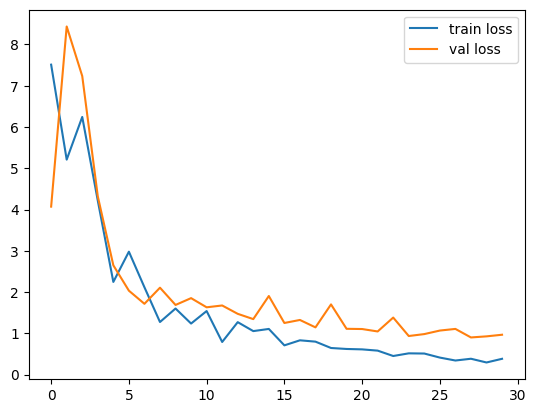

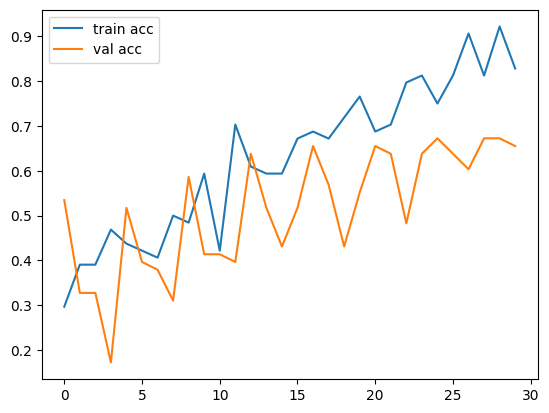

<Figure size 640x480 with 0 Axes>

In [46]:
# ploting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
# ploting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [47]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

After loading the model, let’s perform predictions on the test set.

In [48]:
y_pred = model.predict(test_set)
y_pred

2/2 [==============================] - 13s 6s/step


array([[8.35519284e-03, 4.17907499e-02, 9.49854076e-01],
       [2.58645080e-02, 3.17401111e-01, 6.56734347e-01],
       [1.04325367e-02, 8.10297728e-01, 1.79269701e-01],
       [1.37367249e-02, 7.96876669e-01, 1.89386472e-01],
       [2.87547298e-02, 3.65065068e-01, 6.06180131e-01],
       [1.17033429e-01, 7.99590945e-01, 8.33756402e-02],
       [1.01217721e-03, 7.64082193e-01, 2.34905750e-01],
       [1.66397840e-02, 9.24296737e-01, 5.90633973e-02],
       [7.91908324e-01, 5.79695776e-02, 1.50122151e-01],
       [9.20439437e-02, 2.25273237e-01, 6.82682753e-01],
       [3.76970833e-03, 8.16774607e-01, 1.79455787e-01],
       [1.44519657e-02, 1.18604407e-03, 9.84361947e-01],
       [2.10894216e-02, 8.16402733e-01, 1.62507728e-01],
       [1.99167915e-02, 8.07237267e-01, 1.72846034e-01],
       [3.25998813e-01, 2.46942341e-01, 4.27058756e-01],
       [2.40344219e-02, 4.17511791e-01, 5.58453858e-01],
       [2.78676656e-04, 9.43624914e-01, 5.60965315e-02],
       [1.19539229e-02, 2.31101

In [49]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 2,
       2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 0, 2, 1,
       2, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1])

In [50]:
from tensorflow.keras.models import load_model
#Load the h5 file in the model
model=load_model('model_resnet50.h5')

In [51]:
img=image.load_img('/content/drive/MyDrive/dataset/Test/lamborghini/11.jpg',target_size=
                    (224,224))
x=image.img_to_array(img)
x


array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [52]:
#Shape of the image
x.shape
#output:
(224, 224, 3)
#Normalizing the image pixels values
x=x/255
#Expand the Dimensions of the image
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape
#output:
(1, 224, 224, 3)

(1, 224, 224, 3)

In [53]:
model.predict(img_data)

a=np.argmax(model.predict(img_data), axis=1)
a==1


1/1 [==============================] - 0s 208ms/step


array([False])